# Machine Error


## Introduction

Computers are arguably the most powerful pieces of technology we humans have created in this day and age.  The birth of the computer was said to be fist introduced by Thomas Hobbes, who argued that logic can be explaioned through arithmetic, mathematics.

"...Computation. Now to compute, is either to collect the sum of many things that are added together, or to know what remains when one thing is taken out of another...and if any man adde multiplication and Division, I will not be against it, seeing Multiplication is nothing but Addition of equals one to another, and Division nothing but a Subtraction of equals one form another, as often as is possible. So that all..."
-Hobbes, Thomas, 1656


Computers, in a sense, were created to be our companions, ever since computers made their way into our lives we have been obessed with trying to make them think, and we want them to think for themselves, not think for us, which is kind of what they do right now. 

Humans really are incredible creations of nature, humans dont have many limits, is there a wall you cant climb? Build stairs, You want to go accross the world but not waste years of your life on a boat? Build an airplane. The human mind, throughout eons of evolution, has been catered to be the sharpest tool the world has to offer. So whats the difference between the human and the computer? Their limits. 

Machine Error(Or Epsilon) is the upper bound on the relative error due to rounding foating point arithmetic. Machine Error is cumulative, lets say you are making your computer do 'n' amount of calculations, the amount of errors could range anywhere from 1 to n times the machine accuracy. An example of relative error can be given by a simple calculation: 

-Lets assume the exact Value of some measurment is $50$ and its approximation is $49.9$, we can then say the absolute error of this calculation is: 

$50$ - $49.9$ = $0.1$

-The relative error of these calculations would be as follows:

$0.1 / 50$ = $0.2%$

Rounding is used to represent a real number in a floating point number system.  In a system of numbers and a rounding procedure, machine epsilon is the maximum reative error of the rounding procedure. In computing, floating point arithmetic is an estimation using formulaic representation of real numbers where real numbers are values of a continuous quantity that represents a distance along a line, examples of floating type numbers are:

$7$, $3.2$, $1.222222$, and so forth.

https://en.wikipedia.org/wiki/Machine_epsilon  
http://www2.lawrence.edu/fast/GREGGJ/Math420/Section_6_2.pdf
https://www.ted.com/talks/george_dyson_at_the_birth_of_the_computer/up-next?language=en#t-774134
https://www.cengage.com/resource_uploads/downloads/0538733519_248634.pdf

## Part 1



Real numbers serve as a trade off between range and precision. In a computer real numbers are represented with finite precision, even if they are not finite. Rounding errors are inevitable when finite-precision computer memory locations are used to show real, infinite precision numbers. Simple algorithms, such as Gaussian elimination or methods for solving differential equations can magnify errors.  In linear algebra "Gaussian Elimination" is known as "Row Reduction" which is used for solving systems of linear equations in matrices anywhere from 1x1 to nxn matrices.  


In a computer, performing Gaussian Elimination on matrices, is very ideal becasue of how fast computers are with numbers. When we do arithmetic with a computer we are taking advantge of the CPU's native hardware facilities, the CPU(Central Processing Unit) is the brain of the computer where the majority of the calculations take place. The trade off between this quick method is that the CPU's hardware for doing arithmetic is used for representing real numbers. The data type for doing real valued calculations is the IEEE754(Institute of Electrical and Electronics Engineers) double precision floating point data type. This data type is a sequence of 64 bits divided into a bit sign, positve or negative, an 11 bit exponent, and a 52 bit mantissa, we will go in detial a bit later. The interesting aspect about this is that it only allows us to represent a maximum of 16 decimal digits in any number, any digit beyond 16 are dropped, if your term is beyond 16 digits your computer rounds it to the 16th digit since that is all it can handle. If your digit is, lets assume, 17 digits long cutting off at 16 wont make for much of an error, but lets say your decimal digit is 25 digits or 50 or even 200 decimal digits long, then the computer is commiting a vital error in its calculations. Now imagine if that original 200 decimal digit is used in multiple equations henceforth, every single time your computer is committing more and more errors, which is why Machine Epsilon is cumulative.

In Python to calculate Machine Epsilon we used the following code, which gave us the smallest decimal digit we can achieve with our CPU's. 


https://en.wikipedia.org/wiki/Gaussian_elimination 
http://math.ecnu.edu.cn/~jypan/Teaching/NA/refs/Numerical%20Analysis%202nd.Sauer.2012.pdf
https://www.cengage.com/resource_uploads/downloads/0538733519_248634.pdf

In [60]:
def findEpsilon(): # Write a function to calculate machine epsilon
    """ Function returns the value of machine epsilon
    
    keywords:
    out: returns the expononent beyond which the machine does not see differnce between numbers and the value of machine epsilon
    in decimal as a pair of numbers.
    
    
    """
    
    # set exponent to 1
    
    n = 1 #n is our exponent and is set to 1
    x = 2**(-n) #x is set to the power of negative n dividing by 2
    
    # Keep dividing with 2 till machine can't see a difference
    
    while (1 + x != 1):
        n += 1
        x = 2**(-n)
        
    out = 1-n, 2**(1-n)
    return out

Very simply what is happening in this code is we're setting our $n$ to $1$ in the beginning and our $x$ to $2$ to the power of negative $n$ which is a fancy was of saying we're going to be dividing by $2$ to the power $n$.  Now our while loop states that we will add $1$ to the value of $x$ and see if its still equal to $1$, the operate $!=$ stands for if two operands are not equal, then condition becomes true. so while $1$ + $x$ is equal to $1$ keep adding a value of $1$ to our n value and this will make our $x$ value become increasingly smaller, our goal is to hit Epsilon, so basically until the machine can't see a difference becasue our $x$ is so close to $1$ it is basically $1$, to our computer.  When we hit said number we want the computer to blurt out that it hit the gold mine, pretty small gold mine but nonetheless a gold mine, and it'll return a value of $n$ - $1$ and $2$ to the power ($1$ - $n$) lets see what we get.

In [61]:
findEpsilon()

(-52, 2.220446049250313e-16)

Well we struck gold at -52, and our smallest n is -16 which makes sense,we were actually looking for both of these numbers. 

We dont want to just figure out the smallest figure our computer can hold we also want to find the largest number our can store without causing any type of roundig error.

In [62]:
def findLargest():
    """Here we are finding the largest floating point number that our computer can store before breaking down
    
    
        Keywords:  Function Should return an error, but when prompted to print the value of n we will get a value"""


n = 1

while True:
    x = 2.**n
    n += 1

OverflowError: (34, 'Result too large')

In [63]:
print(n)

1024


Our findLargest function is taking an n and then inputting it in the power of to what ever the value of n is, then it will add 1, our initial value is 1, the goal is to find the largest n that will basically break the CPU and spit out an error which we get, this is important because we will need this for later on when we are determining our bounds and limits. After that we want to print the number that made our computer break, hence the print function, now we have the largest number our computer can hold and the largest value our computer can hold:

$$ 2^{-52}and  2^{1024}$$




Our computers are programmed to be as precise as possible up to a certain number that it can store, now while it is possible for the machine to go passed its limits after said number, in either direction, it will begin to commit errors, numerically, this is the main idea behind machine epsilon.  The way that the computer stores floating point numbers in its CPU is with something called the IEEE754, The Institute of Electronic and Electrical Engineers. It stores it in Binary, the numbers 0 and 1 are platforms for how the computer will read numbers, and how it normalizes them.  The way the computer normalizes numbers comes in three different sections that come together, such as:


| Sign         | Exponent    | Mantissa     |
|:-------------|:------------|:-------------|
|$0$  or $1$   |$n$ + bias   |$010101...000$|


As you can see there are multiple parts that come into play when storing a number in python. First of all we have to verify whether the number is either positive or negative, we do this by either putting a 1 or a 0 in the beginning 0 representing a positive number and 1 representing a negative number, we dont necessarily include this in the actual binomial representation, in  the mantissa, since it is implied in our calculations. The next section is known as the exponent. The exponent is made up of 11 bits, 11 spaces to insert either 0 or 1, the reason why it is 11 bits is because there are 11 possibilities that we can arrange 0 or 1, or 2^11 which gives us a total of 2048. This number is very important because this is the range of the limit of our computer! Now keep in mind that we need to include both positive and negative integers, like we addressed in the beginning of our explanation, so to do that we simply divide:

$$\frac{2048}{2}$$

Now before we dwell into the division of 2048 I want to address two special cases. The first case is 0, it gives us neither a positive nor negative so we dont need to include it in our range, the second case is 2047 which to our computer is infinity, we leave out these two numbers and if we proceed with our calculation we get -1022 to 1023 as our range for our exponent. 1023 is a very important number, it is known as our Exponent bias. The Exponent bias is  
what is used to represent our exponent in our 11 bit section of the IEEE, lets say for example we have $2^{5}$ as our bit, 5 would be our exponent, now we take 5 and add the bias to that, or 1023, and then we get 1028, which is how itll be represented in our 11 bit strip below:


|1024|512|256|128|64|32|16| 8 | 4 | 2 | 1 |
|---|---|---|---|---|---|---|---|---|---|---|
|$1$|$0$|$0$|$0$|$0$|$0$|$0$|$0$|$1$|$0$|$0$|  


So as you can see the there are labels to make it a bit easier for someone who doesnt understand where the positioning of the codes would go. Since our e + bias is 1028 we need to find the bits that will add up to 1028, which in this case is 1024 + 4 so we put our value of 1 in both of those bits, this giving us our total, and 0's everywhere else.
 
 
 The next part is called the mantissa. First we begin with an example:

$1.248$ is the same as $1248$ x $10^{-4}$

In this specific example '12489' is your mantissa and $10^{-4}$ is your exponent, the Mantissa is known as the signifcand of the notation and in the computer you will also convert this into binary,into 0s and 1s, and the limit for this is 52 bits, this number in binary would be:

$0b10011100000$


Now the next logical question is what are we going to do with the remaining 52 bits after we enter our code. If there are no more digits after your conversion ends then you have to enter 0's until you reach 52, simple enough, the head scratcher comes when you have code after the 52nd digit, what do you do then? There are three specific cases made specially for this;

We dont always want to truncate, or chop, the bits after bit 52 because then we will be rounding down, which in the long run causes erros, these errors accumulate, as we mentioned before. So to avoid this we do something called rounding. 

Case 1: If after the 52nd bit in the mantissa there is a 0 then you truncate every 0 after that, this qualifies as a form of rounding.

Case 2: If the 53rd bit is a 1 you add the 1 to the 52nd bit an adjust the code before it accordinly. 

Ex: lets say your code ends with 0001 and your 53rd digit is a 1. You would then 'add' the 1 to the 52nd digit and you new code would be 0010, this is what is meant when you add the 53rd digit.

Case 3: If the 53rd bit is a 1 followed by 0's there are two sub cases that are followed by this and depending on this you either chop all the bits after the 52nd bit or round the 52nd bit, kind of a combination of the first two. 
  
  
  Case 3i: If 52nd  = 1, then take the 1 and add, same as Case 2.
 
 
  Case 3ii: If the 52nd = 0, then you leave as is and chop everything else, same as Case 1.
  
 These two subcases are equally probable to happen so its a way for the machine to overcorrect its errors and hopefully these two cases cancel each other out, resulting in more accurate answers, which is our end goal.



If you wanted to convert '10011100000' back into an integer you would have to use a formula or you could do a simple trick, you can simply divide the integer by 2 and record the remainder of every integer and continue untile you get a number you cannot divivde into anymore, for example:

$1248$ / $2$ = $624$ + $0$ <- Remainder we record

 $624$ / $2$ = $312$ + $0$ 

$312$ /  $2$ = $156$ + $0$

$156$ /   $2$ = $78$ + $0$

$78$ /    $2$ = $39$ + $0$

$39$ /    $2$ = $19$ + $1$

$19$ /     $2$ = $9$ + $1$

$9$ /      $2$ = $4$ + $1$

$4$ /      $2$ = $2$ + $0$

$2$ /      $2$ = $1$ + $0$

$1$ /      $2$ = $0$ + $1$

If we take all the remainders from top to bottom we get: 

$10011100000$, 

which is what we got before so we know that it works, we can aslo show this in code to prove our assumptions.
https://www.cengage.com/resource_uploads/downloads/0538733519_248634.pdf

In [64]:
bin(1248)

'0b10011100000'

This function spits out a binary for any integer we put in the parantheses, not floating point numbers, we will deal with those shortly. Now if we wanted the reverse, say we have a bunch of bianry and we wanted an integer out of it we would use this

In [65]:
int('10011100000', 2)

1248

As you can see this is a perfect way to check our answer and make sure it is correct. The way it works is simple you insert your binary with '' single quote marks and then you specify which base you are working with, obviously we are dealing with computers so we want base 2. 


One question arises when dealing with mantissa and binary calculations and that is how to calculate the binary code of a floating point number. Let say we have the number 27.375 base 10 and we wanted to convert it to base 2, what would we do?


We first spit up the integer and the decimal, so we have 27 and .375, next we calculate the binary of each number individually: 

$27$ / $2$ = $18$ + $0$

$18$ / $2$ = $9$ + $0$

$9$ / $2$ = $4$ + $1$

$4$ / $2$ = $2$ + $0$

$2$ / $2$ = $1$ + $0$

$1$ / $2$ = $0$ + $1$

So we get $(27)_{10}$ = $(100100)_{2}$  


Now to address the decimal, we are using the same logic as before but instead of dividing by 2 we want to multiply by 2 and instead of collecting the remainder we are collection the integer, which will be either 0 or 1, logically this makes sense becasue in the end our answer will be in the form of a floating number base 2 instead of base 10 and it wil be comprised of both binary integer and binary decimal.

$.375$ x $2$ = $0.75$ <- we want the 0

$.75$ x $2$ = $1.5$ <- we store the 1

$.50$ x $2$ = $1.0$ 

This one was relatively simple, the goal is to achieve 1.0, but this is not always the case in many cases there will be long arithmetic and even infinite decimals. 

So we get $(.375)_{10}$ = $(.110)_{2}$

Now we can put everything together to get our answer:

$(27.375)_{10}$ = $(100100.110)_{2}$


If we wanted to store this in our computer it would be as follows:


|Binary         | Scientific notation    | Sign         | Exponent    | Mantissa     |
|:---------------|:-----------------------|:-------------|:------------|:-------------|
|$100100.110$    |$1.001001100 \times 2^5$|$0$           |$5$ + bias   |$0010011...000$|

We will continue with this table to fill out an array of decimal numbers and binary codes to really solidify the process of conversion.


|Decimal         |Binary           |Scientific notation     | Sign         | Exponent    | Mantissa     |
|:-------------- |:--------------- |:-----------------------|:-------------|:------------|:-------------|
|   $9$          |$1001$          | $1.001 \times 2^3$     |$0$           |$10000000010$   |$001000...000$|
|   $45$         |$101101$        | $1.01101 \times 2^{5}$|$0$            |$10000000100$   |$011010...000$|
|   $11.105$   |$1011.00011...1110$| $1.01100011...1110 \times 2^3$|$0$   |$10000000010$  |$011000...1110$|
|   $19.40625$   |$10011.01101$   | $1.001101101 \times 2^{4}$|$0$        |$10000000011$|$001101101...000$|
|   $25$         |$11001$          | $1.1001 \times 2^{4}$   |$0$         |$10000000011$   |$100100...000$|
|   $1365$       |$10101010101$   | $1.0101010101 \times 2^{11}$|$0$     |$10000001010$|$0101010101...000$|
|   $31$         |$11111$        | $1.1111 \times 2^{4}$|$0$              |$10000000011$     |$1111...000$|






If we want to show the work for some of these we can do it as follows:


Decimal: $1365$         


Binary: $10101010101$

$1365$ / $2$ = $682$ + $1$

$682$ / $2$ = $341$ + $0$

$341$ /$2$ = $170$ + $1$

$170$ / $2$ = $85$ + $0$

$85$ / $2$ = $42$ + $1$

$42$ / $2$ = $21$ + $0$

$21$ / $2$ = $10$ + $1$

$10$ / $2$ = $5$ + $0$

$5$ / $2$ = $2$ + $1$

$2$ / $2$ = $1$ + $0$

$1$ / $2$ = $0$ + $1$

So our binary representation of $(1365)_{10}$ = $(10101010101)_{2}$



Another example from our table:

Decimal:  $19.40625$


Binary: $10011.01101$

Here we will be reverse engeineering our binary code to get our decimal. First we will figure out the integer of our mixed number $(10011)_{2}$

We want to count how many places are in our digit so we begin with 0 from right to left. Upon counting we get our highest exponent of 4, so $2^{4}$ so then we go down all the way to $2^{0}$ multiplying by 0 and 1 respectively, so:

$1$ x $2^{4}$ + $0$ x $2^{3}$ + $0$ x $2^{2}$ + $1$ x $2^{1}$ + $1$ x $2^{0}$


$(1 x 16) + (0 x 8) + (0 x 4) + (1 x 2) + (1 x 1)$ = $19$


When we finish our calculatios we get $19$ which is the integer of our decimal number. Next we do the decimal representation of our decimal number.  When calculating the decimal with binary numbers we use the same method that we did before except with a few differences, one is we start from left to right and we begin with 1 instead of 0, and the exponents are negative instead of positive, so in this case we get $4$ as our largest exponent. so our process will be: 

$0$ x $2^{-1}$ + $1$ x $2^{-2}$ + $1$ x $2^{-3}$ + $0$ x $2^{-4}$ + $1$ x $2^{-5}$


$(0 x \frac{1}{2})$ + $(1 x\frac{1}{4})$ + $( 1 x \frac{1}{8})$ + $(0 x \frac{1}{16})$ + $(1 x \frac{1}{32})$ = $.40625$

When we finish our calculations we get the answer $.40625$ and finally when we put everything together our final answer is $19.40625$ 

https://blog.angularindepth.com/the-simple-math-behind-decimal-binary-conversion-algorithms-d30c967c9724 
http://math.ecnu.edu.cn/~jypan/Teaching/NA/refs/Numerical%20Analysis%202nd.Sauer.2012.pdf
https://www.cengage.com/resource_uploads/downloads/0538733519_248634.pdf



## Part 2


We can use graphs to represent the small iterations or mistakes that our computer makes, if we use the function:

$$g(x) = \frac{log(1 + x)}{x}$$ 

for the different ranges of $x$. 

When we plot different values of $x$ we get the following representation of $x$ and how the graph changes as our $x$ gets smaller and smaller. 

/Users/quervinespinal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log


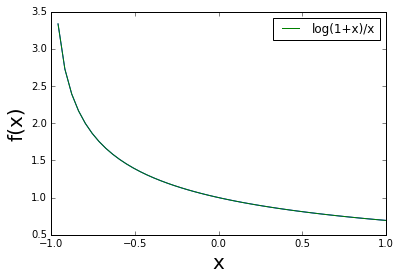

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

end = 1
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.plot(x, y)
plt.plot(x, y, label = 'log(1+x)/x')
plt.legend()

In our code we want to import our numpy and our matplotlib functions from python so we can use both algorithms for graphing and we use the ploting to show a visual of the graph we want, since we will be looking at the graph as feedback for our comparison later on.  We want our max to end at 1 for this first graph since it will be the graph we use as our patient 0, per se.  We want our graph to be of equally spaced intervals from our end points, -end to end, so we use the linspace function on our x axes. Our y axis will plot the actual function of


$$\frac{log(1+x)}{x}$$

The rest of the code is making the graph look presentable, so things like the fontsize, the labeling of the axes and so forth, nonetheless we have our first graph plotted and we know what we have plotted. Now lets see what happens when we take our end point a bit further, how will the graph change in shape, compared to our previous graph.

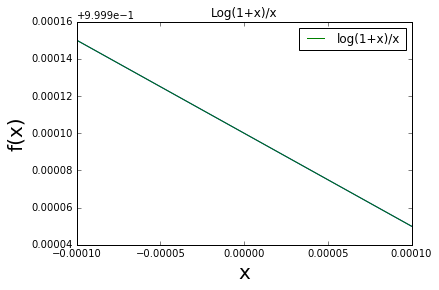

In [67]:
end = 1e-4
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.plot(x, y)
plt.title('Log(1+x)/x')
plt.plot(x, y, label = 'log(1+x)/x')
plt.legend()

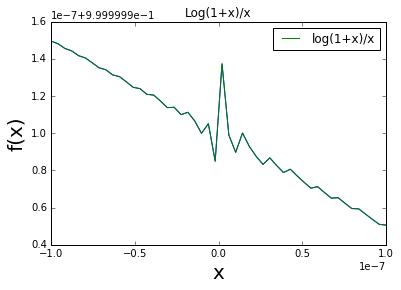

In [68]:
end = 1e-7
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.plot(x, y)
plt.title('Log(1+x)/x')
plt.plot(x, y, label = 'log(1+x)/x')
plt.legend()

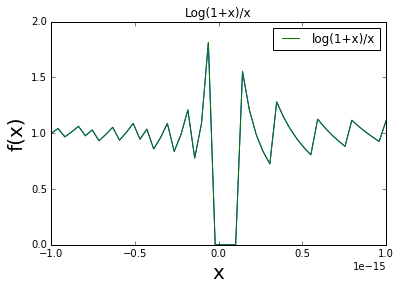

In [69]:
end = 1e-15
x = np.linspace(-end, end)
y = np.where(x==0, 1.0, np.log(1+x)/x)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.plot(x, y)
plt.title('Log(1+x)/x')
plt.plot(x, y, label = 'log(1+x)/x')
plt.legend()

as our x gets smaller and smaller, mathematically our log(1+x) function is getting closer and closer to 1 and log(1) is equal to 0 not to mention out 1/x function is also getting reaching 1 over infinity, this brings about a special case of underflow error that happens in our computers.  Underflow error is when there are incomprehensible amounts of bits containing 0's and eventually some 1 down the line, in our computer these are known as subnormal numbers. After the 52nd bit limit i reached if there are copious amounts of 0s and 1s the could defintely cause some sort of pause, or break in our graph, which could result in the horizontal line presented before us in our previous graph. we could say that the numbers after this point are error prone, which is why the graph acts so strange.  The graph would then continue to crunch numbers normally afterwards, hence why it looks like it gets back on track after it passes 0.0 in the graph.





A lot of errors arive because we are naively plotting the function.  If we introduce the Taylor expansion of the function.  The Taylor expansion of the $f(x)$ is presented as:  

$$f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + ...  \frac{f^{(n)}(0)}{n!}x^n + \frac{f^{n+1}(\psi)}{(n+1)!}x^{n+1},$$


where $\psi$ is some number between $0$ and $x$. For the function.





$$f(x) = \log(1+x),$$ the derivatives are given as

$$f'(x) = \frac{1}{1+x}$$
$$f''(x) = -\frac{1}{(1+x)^2}$$
$$f'''(x) = \frac{2}{(1+x)^3}$$
$$f''''(x) = -\frac{6}{(1+x)^4}$$
$$f'''''(x) = \frac{24}{(1+x)^5}$$

At $x = 0$, the derivatives have the following values,

$$f(0) = 0$$
$$f'(0) = 1$$
$$f''(0) = -1$$
$$f'''(0) = 2$$
$$f''''(0) = -6$$
$$f'''''(0) = 24$$


After we derive the Taylor series once more we see that at 0 the f(x) is equal to 24 at that point.



The Series can be written as: 

$$f(x) = \log(1+x) = x - \frac{x^2}{2} + \frac{x^3}{3} -  \frac{x^4}{4} + R_5.$$

We get:

$$g(x) = \frac{\log(1+x)}{x} = 1 - \frac{x}{2} + \frac{x^2}{3} -  \frac{x^3}{4} + Q_5,$$

where 

$$Q_5 = \frac{x^4}{5(1+\psi)^5}.$$


Here, $0 < \psi < x$. We want the maximuim value of our $\psi$ to see where the machine error is invisible so we want to make $\psi$ = $0$ and then solving accordingly to get our error, which will be our maximum: 


$$Q_5 = \frac{x^4}{5}$$ to obtain



$$\frac{x^{4}}{5} \leq 10^{-16}$$ 


We multiply and isolate $x$ since thats the answer we want.   We get:

$$x \leq\ (5 x 10^{-16})^{\frac{1}{4}}$$, This will give us an approximate answer of:




$$x \approx 1.495 \times 10^{-4}.$$


What we want to conclude here is that the difference between naive plotting and Taylor series apporximation error is invisible to our computer. After this point, the answer we have above, the values for the log function are called error prone and cause the graph to behave in a weird manner, hence the horizontal line in the graph we mentioned before. We want to see what is going to happen when we plot both iterations together and compare the results, we are hoping one is more precise then the other. It is important to note that there is no wrong answer since the taylor series is by all an estimation.

/Users/quervinespinal/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


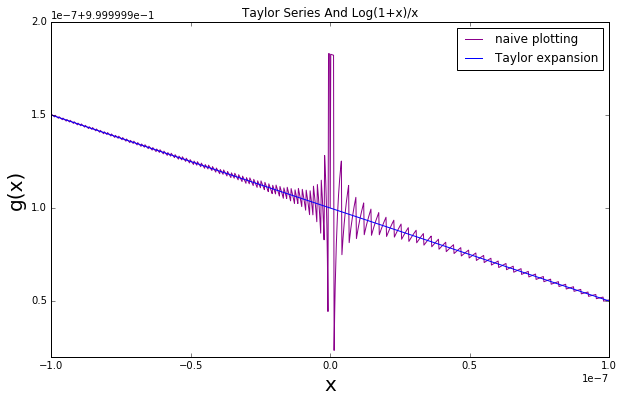

In [70]:
plt.figure(figsize=(10, 6))
end = 1e-7
x = np.linspace(-end, end, 1001)
y = np.where(x==0, 1.0, np.log(1+x)/x)
z = 1 -x/2 + x*x/3 - x*x*x/4 + x*x*x*x/5
plt.xlabel('x', fontsize=20)
plt.ylabel('g(x)', fontsize=20)
plt.plot(x, y,color='#8B008B', label='naive plotting')
plt.plot(x, z, label = 'Taylor expansion')
plt.legend()
plt.title('Taylor Series And Log(1+x)/x')

Upon plotting both graphs on each other we can see which one is more clean. Approximation is valid up until 

$$x \approx 1.495 \times 10^{-4}.$$

At the far end of the graph we can see that the two graphs are fairly similar in their results, 



After that the truncation error is invisible, basically within this range our computer will round effectively, which makes our values valid, but once the range is passed, the numbers will be known as underflow numbers and they will be too small for the computer to see, hence why they are invisible and they are not valid.  You can see that as the value gets closer and closer to 0 the graph gets a bit hectic, that is the naive plotting, our Taylor seires plotting remains relaxed and cool suggesting more certainty in our calculations, which is to be expected.

https://www.techopedia.com/definition/663/overflow-error

### Conclusion

Computers are the most powerful prcoessors we have created to this date. Computers are used for numerous tasks in our everyday lives. The first computer was known as "Colussus" and was created for the purpose of helping us end World War II to break german codes that were beign relayed back to spies in differnet parts of the world, something that no one could solve, and when it was solved it single handedly changed the tide of the war in our favor.  Computers are the master of collecting and processing data, it was what they were made for, although now they do much more, such as even provide security for us. Now although computers are so amazing at doing all of these things at incredibly fast speeds they do have flaws, sadly, and Machine Epsilon is very important when it comes to rounding numbers. Our computers are composed of CPU's which does all the processing of the data stored in the memory of the computer,when we deal with numbers we have a range we can make it up to before our computers start to get weird on us.  


A great example of this is the Aztec empire in 1400's and their greed for world domination. The Aztecs were a generally civilized army and becuase of their intelligence they had great agriculture on a mountain! now it doesnt sound like much but when you can cultivate food and raise cattle on that same mountain top you can focus less on migrating and more on weapons, combat training and army making. The Aztecs were basically undefeated on that mountain top, every enemy that dared to challenge them had to go up a mountain, be at an elevation disadvantage and lets not forget the impenetrible defense they had, they had not weak spots, they were on top of a mountain so they coudnt be blind sided. Long story short the Aztecs won A LOT of wars back in the CE era of the world and they did what you do normally when youre in power, you divide and conquer, seems simple enough.  This is where the comparison comes into play, The Atecs strethced their limits out much too far, by the end of their reign they were so spread out thin, they had no control over all of their territory, their communication was faulty and made many mistakes that made them lose many valuable resources. In Computing Machine Epsilon is very similar to this.  a computer does calculations for days and gets them correct most of time, now the issue is the computer has a limit it can reach, before communications get faulty and soldiers start acting on their own and get their heads chopped off. The Limits in our computer are knwon as machine epsilon, now the computer has a sort of built in mechanism where it rounds certain numbers past this point, using the IEEE standard, the rounding is good but not perfect, when you go to far mistakes begin to happen among calculations in your math and the worst part is the errors made by some soldiers gets spread out to the rest of the infantry becasue monkey see monkey do, errors accumulate and carry on, leading to larger errors down the line.   


Now lets say we want the soldiers to be more accurate in the way they communicate so they can regain some power and keep reigning supreme.  The Taylor series approximation is the equvialent to this.  The taylor series, being a straight line in our example above, is more accurate with less flaws compared to our Log function, which works until we get too close to 0, then it becomes a bit crazy, although the Taylor series works a bit more efficiently it doesnt work all the way, so in the end the Aztecs lose some land.


Ive learned how accurate machines really are, the way the computer records numbers is very flawless, up to a certain point, but before that point theres no way it could get it wrong and that in itself is extraordinary and even with that upper error bound it has rounding implied so it can try and overcome situations in where the CPU cant print out numbers that large or small.


https://en.wikipedia.org/wiki/Aztec_Empire

# Sources



https://en.wikipedia.org/wiki/Machine_epsilon 

http://www2.lawrence.edu/fast/GREGGJ/Math420/Section_6_2.pdf

https://www.ted.com/talks/george_dyson_at_the_birth_of_the_computer/up-next?language=en#t-774134 

https://en.wikipedia.org/wiki/Gaussian_elimination 

https://blog.angularindepth.com/the-simple-math-behind-decimal-binary-conversion-algorithms-d30c967c9724 

https://www.techopedia.com/definition/663/overflow-error

http://math.ecnu.edu.cn/~jypan/Teaching/NA/refs/Numerical%20Analysis%202nd.Sauer.2012.pdf

https://www.cengage.com/resource_uploads/downloads/0538733519_248634.pdf

https://en.wikipedia.org/wiki/Aztec_Empire
